# ACSE-3 (Numerical Methods)  <a class="tocSkip">

## Lecture 4: Nonlinear Solvers (Root-Finding)  <a class="tocSkip">
    
###  Homework Exercises <a class="tocSkip">

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Homework" data-toc-modified-id="Homework-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Homework</a></span><ul class="toc-item"><li><span><a href="#Homework---Bisection-method" data-toc-modified-id="Homework---Bisection-method-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Homework - Bisection method</a></span></li><li><span><a href="#Homework---A-single-function-for-Newton,-Quasi-Newton-and-Secant-methods" data-toc-modified-id="Homework---A-single-function-for-Newton,-Quasi-Newton-and-Secant-methods-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Homework - A single function for Newton, Quasi-Newton and Secant methods</a></span></li><li><span><a href="#Homework---Compare-methods-[$\star$]" data-toc-modified-id="Homework---Compare-methods-[$\star$]-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Homework - Compare methods [$\star$]</a></span></li><li><span><a href="#Homework---Formulate-and-solve-a-nonlinear-financial-problem" data-toc-modified-id="Homework---Formulate-and-solve-a-nonlinear-financial-problem-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Homework - Formulate and solve a nonlinear financial problem</a></span></li><li><span><a href="#Homework---Implement-a-nonlinear-system-solver-[$\star\star$]" data-toc-modified-id="Homework---Implement-a-nonlinear-system-solver-[$\star\star$]-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Homework - Implement a nonlinear system solver [$\star\star$]</a></span></li></ul></li></ul></div>

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# the following allows us to plot triangles indicating convergence order
from mpltools import annotation
# scipy's optimization
import scipy.optimize as sop
import scipy.linalg as sl

from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

# font sizes for plots
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'Dejavu Sans']

# Homework

## Homework - Bisection method

Implement the bisection algorithm described in the Lecture - see if you can implement both a stand-alone function and apply it to our two problems (and compare with the Scipy result).  

You can base this on the algorithm description in class, or the psuedo-code available here <https://en.wikipedia.org/wiki/Bisection_method#Algorithm>.

In [9]:
def bisection(f, a, b, tol):
    """ Function to perform root bracketing on the function f(.)
    between a and b, with fixed interval size dx.
    Returns the bracket of size dx that contains the root.
    """ 
    sign_l = np.sign(f(a))
    sign_r = np.sign(f(b))
    
    assert sign_l != sign_r
    left = a
    right = b
    mid = (left + right) / 2.
    sign_m = np.sign(f(mid))
    delta = right - left
    
    count = 0
    
    while delta > tol:
        if f(mid) == 0:
            return mid
        
        if sign_l == sign_m:
            left = mid
            
        else:
            right = mid
        mid = (left + right) / 2.
        sign_m = np.sign(f(mid))
        delta = right - left
        
        count += 1

    return mid, count

# case 1
def f(x):
    return x - np.exp(-x)

a, b = -1., 1.
print('sop.bisect(f, a, b) = ',sop.bisect(f, a, b),'\n')

print('self function biscrtion = ', bisection(f, a, b, 1e-10), '\n')

# case 2
def f(x):
    return 2*x + x*np.sin(x-3) - 5

a, b = 0., 5.
print('sop.bisect(f, a, b) = ',sop.bisect(f, a, b),'\n')

print('self function biscrtion = ', bisection(f, a, b, 1e-10),'\n')

sop.bisect(f, a, b) =  0.5671432904109679 

self function biscrtion =  (0.567143290390959, 35) 

sop.bisect(f, a, b) =  2.7903546180675676 

self function biscrtion =  (2.790354618082347, 36) 



## Homework - A single function for Newton, Quasi-Newton and Secant methods

Use the Newton function from the lecture, but with different definitions of the `dfdx` function so that it actually implements the Newton, Quasi-Newton or Secant method. 

Test your methods by outputting the $x$ iterations in each case, and compare against iterations from our dedicated quasi-newton and secant functions (you'll need to update these to print out the iterations as well).

In [17]:
def newton(f, x0, dfdx, atol=1.0e-6):
    """ Function to implement the Newton-Raphson method
    
    f is the function we are trying to find a root of
    
    and dfdx is another function which return the derivative of f
    """
    x = [x0]
    fevals = 0
    k=0
    while True:
        x.append(x[-1] - f(x[-1])/dfdx(x[-1],f))  # two function evaluations (f and dfdx)
        fevals += 2
        k+=1
        if abs(x[-1]-x[-2]) < atol:
            print('Newton (analytical derivative) used', fevals, 'function evaluations')
            return x[-1],k
        
        
###### case 1
def f(x):
    return x - np.exp(-x)

def dfdx(x, f):
    return (f(x+1e-10)-f(x))/1e-10

x0 = -1.  # initial guess
print(newton(f, x0, dfdx))
# print(sop.newton(f, x0, dfdx))


###### case 2
def f(x):
    return 2*x + x*np.sin(x-3) - 5



x0 = 0.  # initial guess
print(newton(f, x0, dfdx))


Newton (analytical derivative) used 10 function evaluations
(0.5671432904098033, 5)
Newton (analytical derivative) used 10 function evaluations
(2.7903546180673837, 5)


## Homework - Compare methods [$\star$]

Implement stand alone solvers for picard, bisection, newton, quasi-newton and secant, each of which returns the number of function evaluations. Test them against SciPy on several problems from the lecture.

Compare the number of function evaluations required to find the root of the problem

$$ f(x):= x - \exp(-x). $$

## Homework - Formulate and solve a nonlinear financial problem

Assume you invest a lump sum of £10,000 in a savings account. 

Interest on your savings is calculated (and [*compounded*](https://en.wikipedia.org/wiki/Compound_interest)) monthly at an annual interest rate of 5%. 

Every month you invest a further £500.  

Write a function to calculate the value of your investment as a function of time.

You can compare your function against online compound interest calculators, such as that at

<a href="https://www.thecalculatorsite.com/finance/calculators/compoundinterestcalculator.php">https://www.thecalculatorsite.com/finance/calculators/compoundinterestcalculator.php</a>


[To check your function you could enter into this online calculator £10000 as a base amount, 5% interest, 60 month (or 5 year) calculation period, £500 regular monthly investment, and a monthly compound interval.  You should find an investment balance of £46,978.31 at the end of the period.]


Use a nonlinear solver to work out how many years (or months) it would take you to build up £1M in your investment pot!


Answer: I make the answer 43.0927 years or 517.1120 months

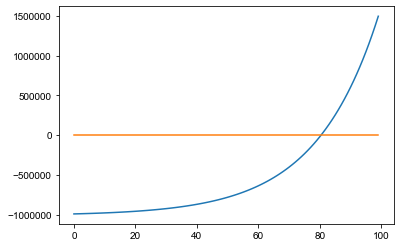

In [39]:
def f(t):
    if t == 0 or t <= 0:
        return 1e4

    return f(t-1)*1.05+500

def g(t):
    return f(t) - 1e6

t = np.arange(100)
G = np.zeros_like(t)
for i in range(len(G)):
    G[i] = g(i)
plt.plot(t, G)
plt.plot(t, np.zeros_like(t))

In [40]:
g(80)

-18771.178663148894

In [41]:
g(81)

30790.26240369375

In [42]:
bisection(g , 80, 81, 1e-4)

(80.00003051757812, 14)

## Homework - Implement a nonlinear system solver [$\star\star$]

This is Kiusalaas Problem set 4.1, Problem 24.

The equations

$$\begin{align*}
\sin x + 3 \cos x − 2 & = 0 \\[5pt]
\cos x − \sin y + \frac{1}{5} & = 0
\end{align*}$$

have a solution in the vicinity of the point $(x,y)=(1, 1)$ (i.e. you are well advised to use this as your starting point. 

Based upon the description from the lecture, implement a version of Newton's method that operates on a **system of equations** and use it to find the root of this problem.

[You can use a numerical approximation method to calculate the Jacobian and `scipy.linalg.solve` to solve the linear system required to yield the iteration update].

You can compare your implementation against the solution obtained in this lecture for scalar cases, and then for systems you could compare against [`scipy.optimize.root`](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.optimize.root.html).

Answer: $(x,y)=(0.7911678,\; 1.12673723)$.